<a href="https://colab.research.google.com/github/Javier-Alfonso-DS/S04_T01_Log_register_transformation_with_Regular_expressions/blob/main/S04_T01_Log_register_transformation_with_Regular_expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Statement

Description

Log analysis is an important function for monitoring and alerting, compliance with security policies, auditing and regulatory compliance, response to security incidents and even forensic investigations. By analyzing log data, companies can more easily identify potential threats and other problems, find the root cause and initiate a rapid response to mitigate risks.

The analyst must ensure that the logs consist of a full range of messages and are interpreted according to the context. Recording elements should be standardized, using the same terms or terminology, to avoid confusion and provide consistency.

As a Data Scientist you have been provided with access to the Logs where the activity of all visits to the travel agency website "akumenius.com" is recorded.

In [126]:
# Mounting Google Drive in order to access data
from google.colab import drive
drive.mount('/content/drive/')
# remember to escape white spaces
#cd to folder Data.
%cd /content/drive/My\ Drive/Data 
#%ls #dir to visualize files in folder. (Unix commands allowed)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data


In [127]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import plotly 
import plotly.express as px
import dateutil

In [128]:
# Update Libraries in Colab enviroment.
 %%capture
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade plotly
!pip install geopandas

In [129]:
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("default")


#    Exercise 1

Standardize, identify and list each of the attributes / variables of the "Web_access_log-akumenius.com" archive structure that you will find in the GitHub repository "Data-sources".

In [130]:
# Read dataset with multiple separators - > Regex expression needed.
#regex_exp = ' - - \[|\] "'
regex_exp = r'(.*) (.*) - - \[(.*)\] \"(.*)\" (.*) (.*) \"(.*)\" \"(.*)\" VLOG='

df = pd.read_csv('./Web_access_log-akumenius.com.txt',sep=regex_exp, engine="python",names=["NaN","HTTP","IP","DateTime","Request","Status","Size","Referer","User Agent","10"])
df = df.drop(columns=["NaN","10"])
df

HTTP  ...                                         User Agent
0               localhost  ...                 Apache (internal dummy connection)
1               localhost  ...                 Apache (internal dummy connection)
2               localhost  ...                 Apache (internal dummy connection)
3               localhost  ...                 Apache (internal dummy connection)
4               localhost  ...                 Apache (internal dummy connection)
...                   ...  ...                                                ...
261868  www.akumenius.com  ...  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869  www.akumenius.com  ...  Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870          localhost  ...                 Apache (internal dummy connection)
261871          localhost  ...                 Apache (internal dummy connection)
261872          localhost  ...                 Apache (internal dummy connection)

[261873 rows x 8 columns]

The data captured has this structure: 

**©Apache access logs structure**

*     The **IP address** of the client.
*     The **identity** of the client determined by identd on the client's machine. Will return a hyphen (-) if this information is not available.
*     The **userid** of the client if the request was authenticated.
*     The **time** that the request was received.
*     The **request** line that includes the HTTP method used, the requested resource path, and the HTTP protocol that the client used.
*     The **status** code that the server sends back to the client.
*     The **size** of the object requested.
*     HTTP **referer**, which represents the address from which the request for the resource originated.
*     **User Agent**, which identifies information about the browser that the client is using to access the resource. 

# - Exercise 2

Clean, preprocess, structure and transform (dataframe) the web access log data.

Now let's explore the data in the dataframe:

In [131]:
df.columns

Index(['HTTP', 'IP', 'DateTime', 'Request', 'Status', 'Size', 'Referer',
       'User Agent'],
      dtype='object')

In [132]:
df.dtypes

HTTP           object
IP             object
DateTime       object
Request        object
Status        float64
Size           object
Referer        object
User Agent     object
dtype: object

In [133]:
round(df.describe(include="all"),1)

HTTP  ...                                         User Agent
count              261846  ...                                             261846
unique                  5  ...                                                735
top     www.akumenius.com  ...  Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
freq               232273  ...                                              50914
mean                  NaN  ...                                                NaN
std                   NaN  ...                                                NaN
min                   NaN  ...                                                NaN
25%                   NaN  ...                                                NaN
50%                   NaN  ...                                                NaN
75%                   NaN  ...                                                NaN
max                   NaN  ...                                                NaN

[11 rows x 8 columns]

**Observations:**     
1. There are 261.846 registers.
2. There are only 5 diferent webs in the log.
3. There are 2921 unique IPs of the requests done to the apache web server.
4. There are 66753 unique requests.
5. Status is going from 200 to 502.
6. There are only 2503 unique referers.
7. There are only 735 unique user Agents.

In [134]:
df.isnull().sum()

HTTP          27
IP            27
DateTime      27
Request       27
Status        27
Size          27
Referer       27
User Agent    27
dtype: int64

Observation: 
8. 27 registers are null

In [135]:
# Let's delete these 27 null rows.
df = df.dropna(how='any',axis=0)
df.isnull().sum()

HTTP          0
IP            0
DateTime      0
Request       0
Status        0
Size          0
Referer       0
User Agent    0
dtype: int64

In [136]:
df= df.dropna(how='all')

In [137]:
df.duplicated().sum()

4563

Observation: 
9. 4589 registers are duplicated of 261846. But this doesn't mean that are not corrects. We will keep them.

In [138]:
# These are the unique values for the column Web
df['HTTP'].unique()

array(['localhost', 'www.akumenius.com', 'akumenius.com', 'akumenius.es',
       'test.akumenius.com'], dtype=object)

In [139]:
# Let's convert DateTime column to DateTime type
from dateutil import parser
df["DateTime"] = df["DateTime"].str.replace(":", " ", 1) # We replace the first ':' so we take off the ':' between Date and Time
datetimes = pd.to_datetime(df["DateTime"], utc=True)
df["DateTime"] = datetimes

In [140]:
df["DateTime"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                        261846
unique                       118729
top       2014-02-28 03:16:25+00:00
freq                             83
first     2014-02-23 02:10:31+00:00
last      2014-03-02 02:10:18+00:00
Name: DateTime, dtype: object

In [141]:
df.dtypes

HTTP                       object
IP                         object
DateTime      datetime64[ns, UTC]
Request                    object
Status                    float64
Size                       object
Referer                    object
User Agent                 object
dtype: object

In [142]:
df

HTTP  ...                                         User Agent
0               localhost  ...                 Apache (internal dummy connection)
1               localhost  ...                 Apache (internal dummy connection)
2               localhost  ...                 Apache (internal dummy connection)
3               localhost  ...                 Apache (internal dummy connection)
4               localhost  ...                 Apache (internal dummy connection)
...                   ...  ...                                                ...
261868  www.akumenius.com  ...  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869  www.akumenius.com  ...  Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870          localhost  ...                 Apache (internal dummy connection)
261871          localhost  ...                 Apache (internal dummy connection)
261872          localhost  ...                 Apache (internal dummy connection)

[261846 rows x 8 columns]

# - Exercise 3

Geolocate the IP's.

In [143]:
%%capture
!pip install ip2geotools

In [144]:
!ip2geotools 5.255.253.53 -d dbipcity

5.255.253.53
Moscow
Moscow
RU
55.7504461
37.6174943


In [145]:
from ip2geotools.databases.noncommercial import DbIpCity
# print(response.latitude,response.longitude)

def get_lat_long(ip):
  try:
    response = DbIpCity.get(ip, api_key='free')
  except ValueError:
    return pd.np.nan  
  try:
    return [response.latitude,response.longitude]
  except:
    return pd.np.nan

print(get_lat_long("5.255.253.53"))

[55.7504461, 37.6174943]


/usr/local/lib/python3.7/dist-packages/ip2geotools/databases/noncommercial.py:77: ResourceWarning:

unclosed <ssl.SSLSocket fd=52, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 60260), raddr=('140.211.167.100', 443)>



ip2geotools has very slow performance, we look for another library on the internet.

We found geolite2, much more efficient. (1min28s all 261K IPs)

In [146]:
%%capture
!pip install maxminddb-geolite2

In [147]:
from geolite2 import geolite2
geo = geolite2.reader()

def get_lat_long(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return [np.nan,np.nan]
    try:
        return [x['location']['latitude'],x['location']['longitude']] if x else [np.nan,np.nan]
    except KeyError:
      return [np.nan,np.nan]


df['lat_long'] = df.loc[:,'IP'].apply(get_lat_long)

In [148]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



HTTP  ...                         lat_long
count              261846  ...                           261846
unique                  5  ...                              852
top     www.akumenius.com  ...  [37.419200000000004, -122.0574]
freq               232273  ...                            52879
first                 NaN  ...                              NaN
last                  NaN  ...                              NaN
mean                  NaN  ...                              NaN
std                   NaN  ...                              NaN
min                   NaN  ...                              NaN
25%                   NaN  ...                              NaN
50%                   NaN  ...                              NaN
75%                   NaN  ...                              NaN
max                   NaN  ...                              NaN

[13 rows x 9 columns]

# - Exercise 3

Show me your creativity, surprise me by going one step further with the previous analysis.

Let's plot all the IPs on a map

In [149]:
%%capture
!pip install gmplot

In [150]:
# Let's split latitude and longitude on two columns
df[['latitude','longitude']] = pd.DataFrame(df.lat_long.tolist(), index= df.index)
df

HTTP             IP  ... latitude longitude
0               localhost      127.0.0.1  ...      NaN       NaN
1               localhost      127.0.0.1  ...      NaN       NaN
2               localhost      127.0.0.1  ...      NaN       NaN
3               localhost      127.0.0.1  ...      NaN       NaN
4               localhost      127.0.0.1  ...      NaN       NaN
...                   ...            ...  ...      ...       ...
261868  www.akumenius.com   5.255.253.53  ...  55.7386   37.6068
261869  www.akumenius.com  74.86.158.107  ...  32.7787  -96.8217
261870          localhost      127.0.0.1  ...      NaN       NaN
261871          localhost      127.0.0.1  ...      NaN       NaN
261872          localhost      127.0.0.1  ...      NaN       NaN

[261846 rows x 11 columns]

In [151]:
# As localhost , 127.0.0.1 doesn't have latitude & longitude, let's drop these registers first.
df = df.drop(index= df[df.HTTP == 'localhost'].index)
df

HTTP             IP  ... latitude longitude
22      www.akumenius.com  66.249.76.216  ...  37.4192 -122.0574
23      www.akumenius.com  66.249.76.216  ...  37.4192 -122.0574
24      www.akumenius.com  66.249.76.216  ...  37.4192 -122.0574
25      www.akumenius.com  66.249.76.216  ...  37.4192 -122.0574
26      www.akumenius.com  66.249.76.216  ...  37.4192 -122.0574
...                   ...            ...  ...      ...       ...
261865      akumenius.com   5.255.253.53  ...  55.7386   37.6068
261866  www.akumenius.com   5.255.253.53  ...  55.7386   37.6068
261867       akumenius.es   5.255.253.53  ...  55.7386   37.6068
261868  www.akumenius.com   5.255.253.53  ...  55.7386   37.6068
261869  www.akumenius.com  74.86.158.107  ...  32.7787  -96.8217

[247719 rows x 11 columns]

In [152]:
# Let's see if there are Nan Latitudes
df.isnull().sum()

HTTP           0
IP             0
DateTime       0
Request        0
Status         0
Size           0
Referer        0
User Agent     0
lat_long       0
latitude      36
longitude     36
dtype: int64

In [153]:
# There are only 36 nulls on latitude and longitude, let's explore them:
df[df.latitude.isnull()]

HTTP              IP  ... latitude longitude
38161   www.akumenius.com  193.150.120.33  ...      NaN       NaN
38162   www.akumenius.com  193.150.120.33  ...      NaN       NaN
38163   www.akumenius.com  193.150.120.33  ...      NaN       NaN
39716   www.akumenius.com  193.150.120.33  ...      NaN       NaN
39717   www.akumenius.com  193.150.120.33  ...      NaN       NaN
39718   www.akumenius.com  193.150.120.33  ...      NaN       NaN
88058   www.akumenius.com  193.150.120.33  ...      NaN       NaN
88059   www.akumenius.com  193.150.120.33  ...      NaN       NaN
88061   www.akumenius.com  193.150.120.33  ...      NaN       NaN
88062   www.akumenius.com  193.150.120.33  ...      NaN       NaN
88063   www.akumenius.com  193.150.120.33  ...      NaN       NaN
88064   www.akumenius.com  193.150.120.33  ...      NaN       NaN
185869  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185870  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185871  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185872  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185873  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185874  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185876  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185877  www.akumenius.com  193.150.120.33  ...      NaN       NaN
185878  www.akumenius.com  193.150.120.33  ...      NaN       NaN
203131  www.akumenius.com  193.150.120.33  ...      NaN       NaN
203134  www.akumenius.com  193.150.120.33  ...      NaN       NaN
203135  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249605  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249606  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249607  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249608  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249609  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249610  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249613  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249614  www.akumenius.com  193.150.120.33  ...      NaN       NaN
249615  www.akumenius.com  193.150.120.33  ...      NaN       NaN
256622  www.akumenius.com  193.150.120.33  ...      NaN       NaN
256623  www.akumenius.com  193.150.120.33  ...      NaN       NaN
256624  www.akumenius.com  193.150.120.33  ...      NaN       NaN

[36 rows x 11 columns]

The IP 193.150.120.33 was not detected by geolite2 but, as the image shows, we can extract the location via https://ipinfo.io/

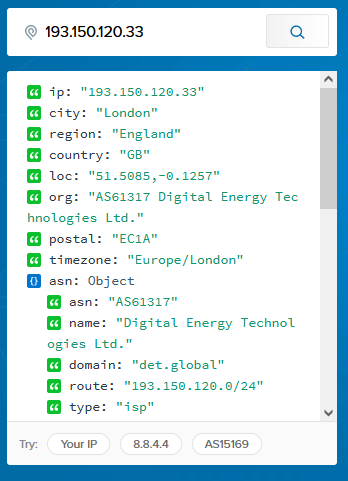

In [154]:
# So, we will populate these NAN's with the location (51.5085,-0.1257)
IPindex = str(df[df.latitude.isnull()].IP.unique())
df[df.IP == IPindex].latitude  = 51.5085
df[df.IP == IPindex].longitude = -0.1257

# Let's plot the IPs on a map.

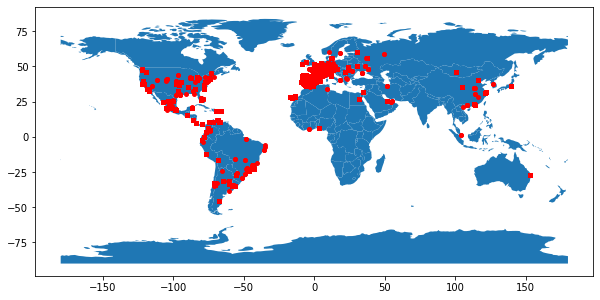

In [155]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [156]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(df,lat='latitude',lon='longitude')
fig.update_layout(title = 'World map with IPs locations', title_x=0.5)
fig.show()

We observe that most of the IPs that connect to our travel agency website "akumenius.com" come from Europe. The rest are from North America, South America and China.

Let's try now to plot a map with the information of how many connections we have recieved from IP location.

In [157]:
# First, we need to know how many times we recieve a connection from the particular IP.
IPs = df.loc[:, ['IP','latitude','longitude']]

In [158]:
IPs.groupby(by='IP').agg(np.size)

latitude  longitude
IP                                  
101.199.108.59         32         32
101.226.167.226         1          1
107.178.37.48         194        194
107.178.38.221        176        176
107.21.14.116           2          2
...                   ...        ...
95.63.234.126         265        265
95.63.60.249          154        154
96.242.31.129          52         52
98.137.206.41          11         11
98.244.10.248          91         91

[2858 rows x 2 columns]

In [159]:
# Let's create a series with the IP value and the number of times a request has been made.
IPgrouped = pd.DataFrame(IPs.value_counts('IP'))
IPgrouped = IPgrouped.reset_index()
IPgrouped = IPgrouped.rename(columns={0:"Requests"})

In [160]:
# Let's find latitude and longitude for these grouped IPs
IPgrouped['lat_long'] = IPgrouped.loc[:,'IP'].apply(get_lat_long)

In [161]:
# Let's split latitude and longitude on two columns
IPgrouped[['latitude','longitude']] = pd.DataFrame(IPgrouped.lat_long.tolist(), index= IPgrouped.index)
IPgrouped

IP  Requests  ... latitude  longitude
0       66.249.76.216     46382  ...  37.4192  -122.0574
1       80.28.221.123     14698  ...  40.4554    -3.4697
2      217.125.71.222      5201  ...  37.3824    -5.9761
3       66.249.75.148      3558  ...  37.4192  -122.0574
4     162.243.192.191      2927  ...  40.7308   -73.9975
...               ...       ...  ...      ...        ...
2853     202.46.57.66         1  ...  22.5333   114.1333
2854     202.46.56.52         1  ...  22.5333   114.1333
2855     202.46.56.46         1  ...  22.5333   114.1333
2856     202.46.55.57         1  ...  22.5333   114.1333
2857  101.226.167.226         1  ...  31.0456   121.3997

[2858 rows x 5 columns]

In [162]:
# Let's plot now IP's on a map with a mesure of number of requests from that IP.

In [163]:

fig = px.scatter_geo(IPgrouped,lat='latitude',lon='longitude',size='Requests',color='Requests',projection='natural earth')
fig.update_layout(title = 'World map with IPs locations and number of requests', title_x=0.5)
fig.show()

As we can see, maximum requests come from East USA and Spain (Madrid). 

Now, finally, let's investigate for all the requests, how many are from each request type.

In [164]:
df

HTTP  ...                     geometry
22      www.akumenius.com  ...  POINT (-122.05740 37.41920)
23      www.akumenius.com  ...  POINT (-122.05740 37.41920)
24      www.akumenius.com  ...  POINT (-122.05740 37.41920)
25      www.akumenius.com  ...  POINT (-122.05740 37.41920)
26      www.akumenius.com  ...  POINT (-122.05740 37.41920)
...                   ...  ...                          ...
261865      akumenius.com  ...    POINT (37.60680 55.73860)
261866  www.akumenius.com  ...    POINT (37.60680 55.73860)
261867       akumenius.es  ...    POINT (37.60680 55.73860)
261868  www.akumenius.com  ...    POINT (37.60680 55.73860)
261869  www.akumenius.com  ...   POINT (-96.82170 32.77870)

[247719 rows x 12 columns]

In [165]:
df['work'] = df["Request"].str.split(' /',1)
# Let's split Request on two columns
df[['Req_Command','trash']] = pd.DataFrame(df.work.tolist(), index= df.index)
df = df.drop(columns=['work','trash'])

In [166]:
df['Req_Command'].value_counts()


GET     229309
POST     16646
HEAD      1764
Name: Req_Command, dtype: int64

So, we found that the majority of requests are GET (229309), next POST (16646) and the minimum are HEAD (1764)